# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [61]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [62]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset = ["AVG_MATH_8_SCORE", "ENROLL_ALL"], inplace = True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20069.0,19958.0,18277.0,NaN,78305.0,272266.0,236.0,273.0,217.0,259.0
1622,1990_WISCONSIN,WISCONSIN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60794.0,56244.0,54562.0,NaN,NaN,797621.0,NaN,274.0,NaN,NaN
1624,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61913.0,62359.0,67026.0,NaN,261916.0,860753.0,240.0,288.0,220.0,269.0
1629,1990_WYOMING,WYOMING,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7935.0,7376.0,6245.0,NaN,NaN,98226.0,NaN,272.0,NaN,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [63]:
print(df["YEAR"].max() - df["YEAR"].min())
print(str(df["YEAR"].min()) + "-" + str(df["YEAR"].max()))

27
1990-2017


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [64]:
mi_score = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()
oh_score = df[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()

print("Michigan: " + str(mi_score))
print("Ohio: " + str(oh_score))
print("\nOhio has the higher average outcome score across all years")

Michigan: 275.8181818181818
Ohio: 281.90909090909093

Ohio has the higher average outcome score across all years


Find the average for your outcome score across all states in 2019

In [65]:
print(df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean())

nan


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [66]:
print(df.groupby("STATE")["AVG_MATH_8_SCORE"].max())

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    266.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [67]:
#How much is expended towards instruction per enrolled studnet?
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_ALL"]

#How much of the state's revenue is spent on education?
df["INSTRUCTION_EXPENDITURE_PERCENT"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_REVENUE"]

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average 8th Grade Math Score')

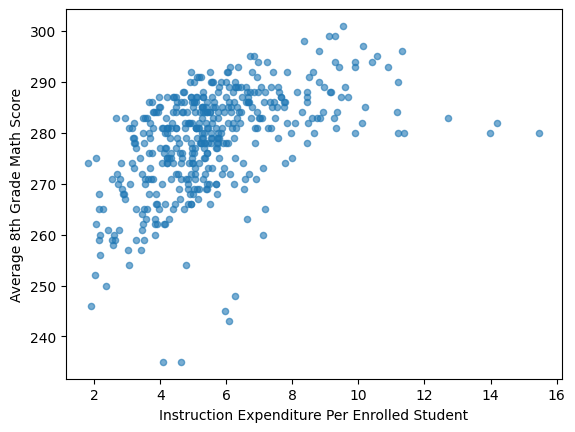

In [68]:
df.plot.scatter(x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Instruction Expenditure Per Enrolled Student")
plt.ylabel("Average 8th Grade Math Score")

There appears to be a logarithmic relationship between the average 8th grade math score and instruction expenditure per enrolled student, with some outliers to the relationship in the bottom left part of the graph.

**Visualization 2**

Text(0, 0.5, 'Average 8th Grade Math Score')

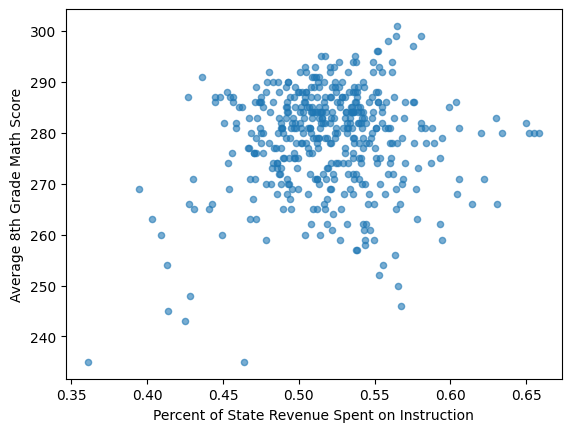

In [69]:
df.plot.scatter(x = "INSTRUCTION_EXPENDITURE_PERCENT", y = "AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Percent of State Revenue Spent on Instruction")
plt.ylabel("Average 8th Grade Math Score")

There does not seem to be any clear relationship between average 8th grade math score and the percent of state revenue spent on instruction.

**Visualization 3**

Text(0, 0.5, 'Average 8th Grade Math Score')

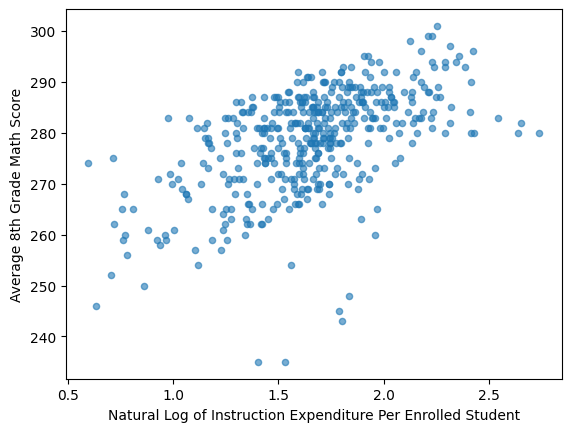

In [70]:
df["LOG_INSTRUCTION_EXPENDITURE_PER_STUDENT"] = np.log(df["INSTRUCTION_EXPENDITURE_PER_STUDENT"])
df.plot.scatter(x = "LOG_INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Natural Log of Instruction Expenditure Per Enrolled Student")
plt.ylabel("Average 8th Grade Math Score")

Effectively the same as Visualization 1, with transformed x-axis using natural log. Now, there appears to be a linear relationship between the average 8th grade math score and the natural logarithm of the instruction expenditure per student.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df[["LOG_INSTRUCTION_EXPENDITURE_PER_STUDENT"]].dropna()
y = df.loc[X.index]["AVG_MATH_8_SCORE"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [78]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, max_error
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MAPE: " + str(mean_absolute_percentage_error(y_test, y_pred)))
print("R2: " + str(r2_score(y_test, y_pred)))
print("Max Residual Error: " + str(max_error(y_test, y_pred)))

MAE: 7.116684686788554
MAPE: 0.02637464496166325
R2: 0.22718126731495047
Max Residual Error: 40.481135432880365


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

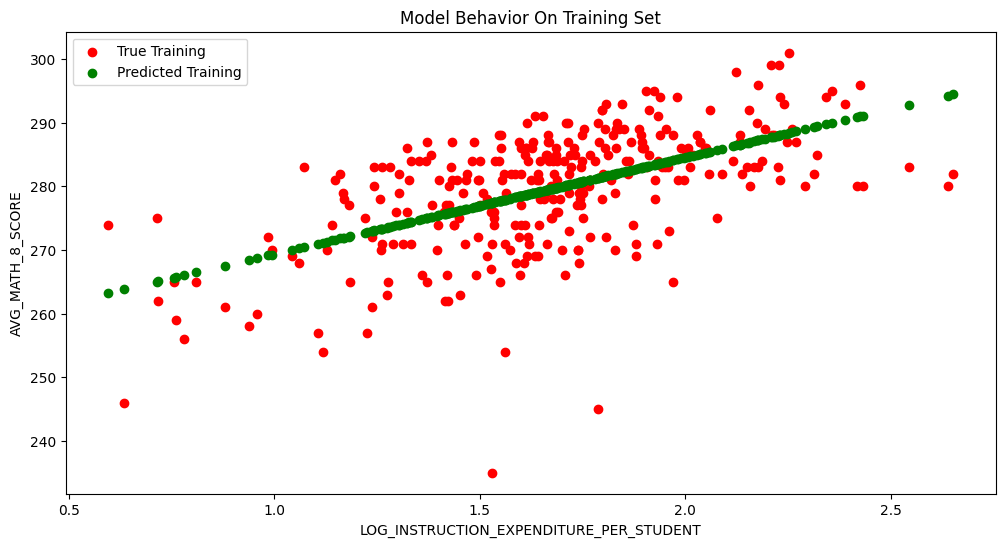

In [79]:
col_name = "LOG_INSTRUCTION_EXPENDITURE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

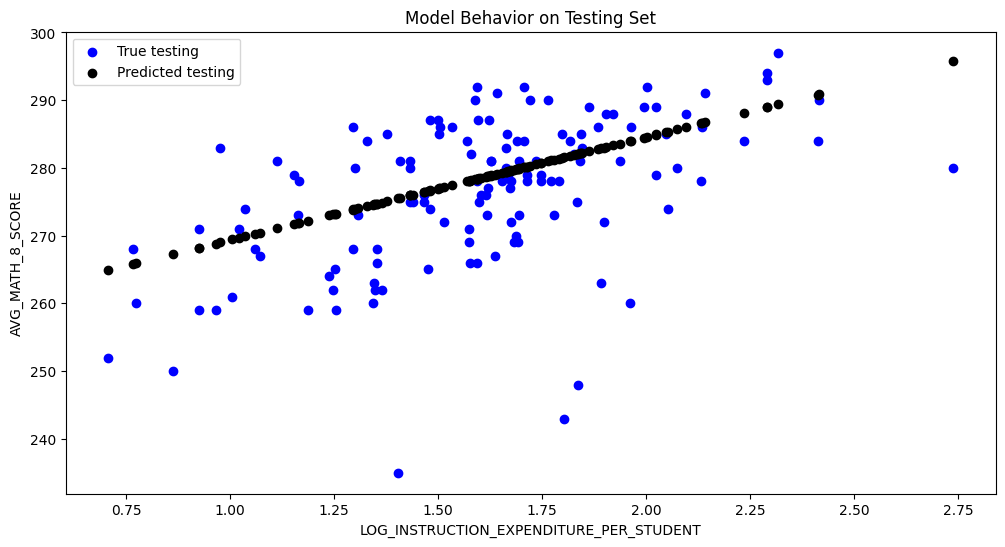

In [80]:
col_name = "LOG_INSTRUCTION_EXPENDITURE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

The instruction expenditures per enrolled student is a fairly good predictor of the average grade 8 math score for different states. Upon initially finding what looked to be a logarithmic relationship between the two variables, setting the expenditures per student on a natural log scale yielded a fairly accurate linear regression model. While there is some variance around the predicted linear models, and a low R2 value, the mean absolute error and mean absolute percent error are both extremely low, with a fairly low maximum residual error given the range/scale of the average 8th grade math score. Visually, the bulk of both the training and testing data centers around their respective predicted trends.